# NAIVE BAYES CLASSIFIER BAG OF WORDS ASSUMPTION

### Loadings packages and functions

In [1]:
from functions import*

In [2]:
df.head(2)
df1=df

## Intuition :

* First idea relies on using naive bayse classifier to deal with the issue of classifying.
* We adopt CBOW representation which is able to give a vector representation for abstracts. Dimensions catch semantic and syntaxique features. This representation allows us to use classifiers in order. 


# Bag of words assumption

Bag of word representation is characterised by a <b>Document Terms Matrix </b> (i.e Documents in rows and Terms in columns).  Documents vector space dimension depends on total unique terms number. Here we are going to use Count-words Matrix and TF-IDF which learn semantical and syntaxical features based on words frequency in documents and corpus. As documents use different words the matrix is sparse. Thus it is worth processing our corpus to reduce dimension whatever the algorithm we use to perform classification. However depending on the word representation  the processing can have a huge impact on estimation.
That's why we are going to seperate our analysis in two cases:

* <b>Count words</b>: Some words  are too frequents in corpus. We consider them as not conveying relevant information to characterize one document among others. We delete them from our vocabulary to stick on more discriminant ones. It allows to be more computationnaly tractable..
* <b>Tf-idf</b>: regularizes frequent words in a corpus by taking the reverse

In [3]:
cleaning=True
no_cleaning=False

In [4]:
# processing_BOW() returns 'text' class which contains 2 attributes (docs,wordcloud) 
# text.docs contains corpus of documents
# text.wordcloud contains all documents merged together. It is dedicated to plot wordcloud.
# see functions.py part "Fonctions for processing" for more details

# if False, we don't have any cleaning nor lemmatization 

noisy_pos_tags=[]
my_stop_words=[]

wiki_clean = processing_BOW('wikipedia', df, no_cleaning, noisy_pos_tags, my_stop_words) 
viki_clean = processing_BOW('vikidia',df, no_cleaning, noisy_pos_tags, my_stop_words)

all_clean = wiki_clean+viki_clean #see functions.py PART PROCESSING -->class text object  which hase two attributes text.docs (i.e corpus)

df['text_BOW'] = all_clean.docs

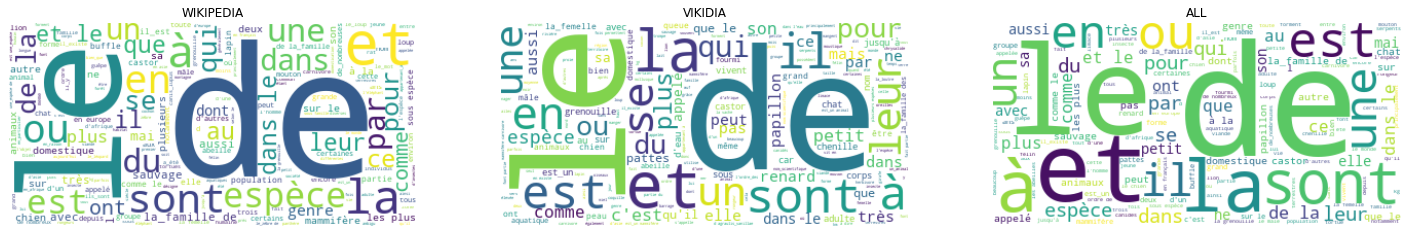

In [5]:
L=[ wiki_clean, viki_clean, all_clean]
titles=["WIKIPEDIA","VIKIDIA","ALL"]
#fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,14))
fig=plt.figure(figsize=(25,25))
k=0

for source in L:
    
    wordcloud = WordCloud(max_words=200, background_color="white").generate(source.wordcloud)
    ax = fig.add_subplot(1,3,1+k)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titles[k])
    k=k+1
  
plt.show()

counts Mean Accuracy: 0.745
counts Variance Accuracy 0.011
tf-idf Mean Accuracy: 0.77
tf-idf Variance Accuracy 0.009


Text(0.5, 1.0, 'Cummulative Mean')

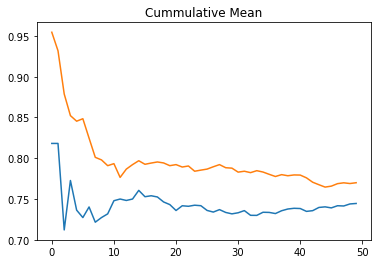

In [6]:
vectorization=['counts','tf-idf']# tf-idf or count

nb_try=50
cleaning=False

#figs,axs=plt.subplots(1,2)

k=0

for vec in vectorization:
    
    samp=sample_split(nb_try, df ,cleaning)
    Scores = Naive_Bayes_model_evaluation(samp,vec)
    inverse=[1/(i+1) for i in range(len(Scores.cumsum()))]
    (inverse*Scores.cumsum()).plot(kind="line")
    print(vec,"Mean Accuracy:",  round(Scores.mean(),3))
    print(vec,"Variance Accuracy",round(Scores.var(),3))

plt.title('Cummulative Mean')






tf-idf without cleaning seem tonwork better than counts. It can be due by the fact tf-idf has already a normalization for frequents words. Let's see if cleaning our data would improve our classification.

## Count Vectors Matrix processing

To lower the confusion between twodocuments it is worth removing all similar words between them. In particular we focus our mind on following tags which we assume to be used in different contexts with same frequency through corpus: 

<ol>
    <li>Stop words</li>
    <li>Determinants</li>
    <li>Coordination conjonction</li>
    <li>adverbs</li>
    <li>Auxiliaries</li>
    <li>Pronouns</li>
</ol>

* More we can remove animal words we used for scrapping as they will be used in the same way bewteen vikidia and wikipedia documents. 
* Finally there are words which are similar to each other then it is worth taking their lemmatized form

In [7]:
noisy_pos_tags = ["PROP","DET","PART","CCONJ","ADP","PRON","SPACE","AUX","PUNCT"]
my_stop_words = ["famille", "espèce","animal",  "éléphant",
    "lion",
    "zèbre",
    "girafe",
    "rhinocéros",
    "léopard",
    "crocodile",
    "chevreuil",
    "ours",
    "lapin",
    "chien",
    "chat",
    "castor d'Europe",
    "cochon",
    "vache",
    "mouton",
    "hérisson",
    "loutre",
    "aigle",
    "hirondelle",
    "corbeau",
    "serpent",
    "tortue",
    "grenouille",
    "limace",
    "escargot",
    "papillon",
    "moustique",
    "guêpe",
    "abeilles à miel",
    "fourmis",
    "loup",
    "renard",
    "buffle",
    "vipère",
    "scorpion",
    "rat"]

In [8]:
# processing_BOW() returns 'text' class which contains 2 attributes (docs,wordcloud) 
# text.docs contains corpus of documents
# text.wordcloud contains all documents merged together. It is dedicated to plot wordcloud.
# see functions.py part "Fonctions for processing" for more details

# if False, we don't have any cleaning nor lemmatization 
wiki_clean = processing_BOW('wikipedia', df,cleaning,noisy_pos_tags,my_stop_words) 
viki_clean = processing_BOW('vikidia',df,cleaning, noisy_pos_tags,my_stop_words)

all_clean = wiki_clean+viki_clean #see functions.py PART PROCESSING -->class text object  which hase two attributes text.docs (i.e corpus)

df['text_BOW'] = all_clean.docs

### WordCloud to check the cleaning

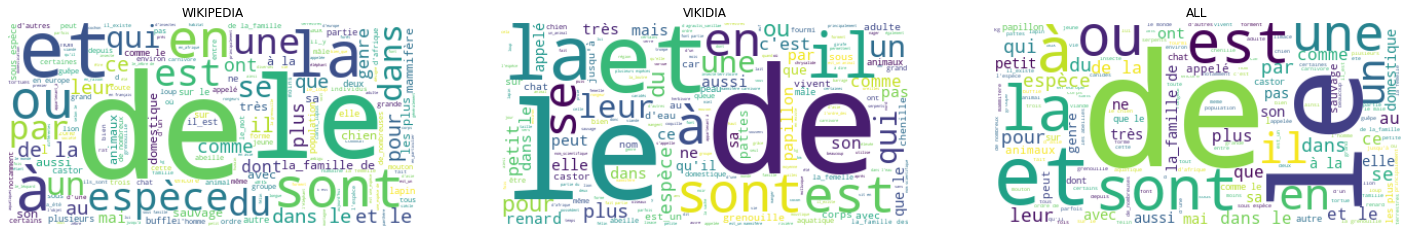

In [9]:
L=[ wiki_clean, viki_clean, all_clean]
titles=["WIKIPEDIA","VIKIDIA","ALL"]
#fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,14))
fig=plt.figure(figsize=(25,25))
k=0

for source in L:
    
    wordcloud = WordCloud(max_words=200, background_color="white").generate(source.wordcloud)
    ax = fig.add_subplot(1,3,1+k)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(titles[k])
    k=k+1
  
plt.show()

## DOCUMENTS TERMS MATRIX

counts Mean Accuracy: 0.794
counts Variance Accuracy 0.01
tf-idf Mean Accuracy: 0.81
tf-idf Variance Accuracy 0.007


Text(0.5, 1.0, 'Cummulative Mean')

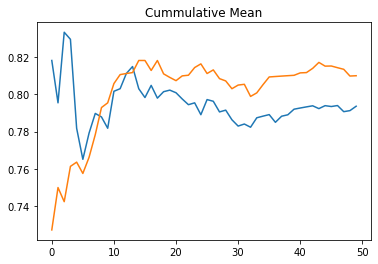

In [10]:
vectorization=['counts','tf-idf']# tf-idf or count

nb_try=50
cleaning=True

k=0

for vec in vectorization:
    
    samp=sample_split(nb_try, df ,cleaning)
    Scores = Naive_Bayes_model_evaluation(samp,vec)
    inverse=[1/(i+1) for i in range(len(Scores.cumsum()))]
    (inverse*Scores.cumsum()).plot(kind="line")
    print(vec,"Mean Accuracy:",  round(Scores.mean(),3))
    print(vec,"Variance Accuracy",round(Scores.var(),3))

plt.title('Cummulative Mean')



* <b>tf-idf </b>:Average accuracy with processing cleaning is about 82% compared to 72% without cleaning.
* <b> Counts </b>:Average accuracy with processing cleaning is about 81% compared to 76% without cleaning.

Thus Cleaning has improved our analysis. More it improves more Counts models compared to tf-idf, as there weren't any regularization on common words.


# 2. Feature Engineering

Now, we just exploit terms diversity and frequency:
We can perform an other Naïve Bayes Classifier based on features related to Abstract source. 
Indeed Wikipedia and Vikidia have differents features which can discriminate each other like the size length or POS tags in sentence. 

## A. "Quantitative" features ( word counts, caracter_counts, word and sentensse size ...)

In [11]:
## Wordcount  
df['word_count'] = df["Abstract"].apply(lambda x: len(str(x).split(" ")))

## Char_count
df['char_count'] = df["Abstract"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))

## Sentence Count
df['sentence_count'] = df["Abstract"].apply(lambda x: len(str(x).split(".")))

## Average word Length
df['avg_word_length'] = df['char_count'] / df['word_count']

## Average Sentence length
df['avg_sentence_length'] = df['word_count'] / df['sentence_count']


#df_meta.head()
df_meta=df.loc[:,['word_count','char_count','sentence_count','avg_word_length','avg_sentence_length']]

print('meta',df_meta.shape)
print("df",df.shape)

meta (74, 5)
df (74, 10)


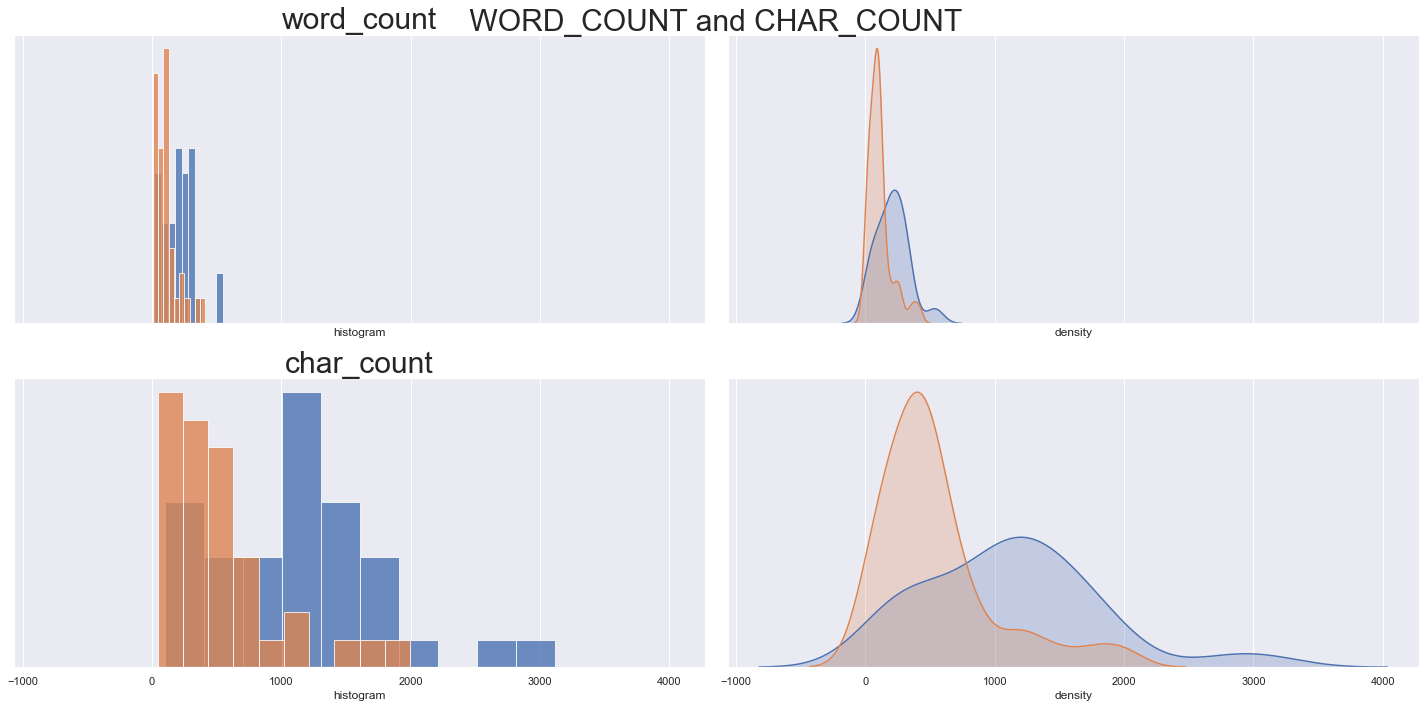

In [12]:
sns.set(style="darkgrid")
fig5,ax5=plt.subplots(2,2,figsize=(20,10),sharex=True)

L0= ['word_count',
 'char_count',
 'sentence_count',
 'avg_sentence_length',
 'avg_word_length'
 ]

k=0
y="Type"
fig5.suptitle(' WORD_COUNT and CHAR_COUNT', fontsize=30)
for x in L0[:2]:
    
    ax5[k,0].set_title(x,fontsize=30)
    
    for i in df[y].unique():
        
        sns.distplot(df[df[y]==i][x], hist=True, kde=False, 
                     bins=10, hist_kws={"alpha":0.8}, 
                     axlabel="histogram", ax=ax5[k,0])
        
        sns.distplot(df[df[y]==i][x], hist=False, kde=True, 
                     kde_kws={"shade":True}, axlabel="density",   
                     ax=ax5[k,1])
        
    k=k+1
    
plt.setp(ax5, yticks=[])
fig5.subplots_adjust(top= 0.93, wspace=0.3 ,hspace=0.5)
fig5.tight_layout()


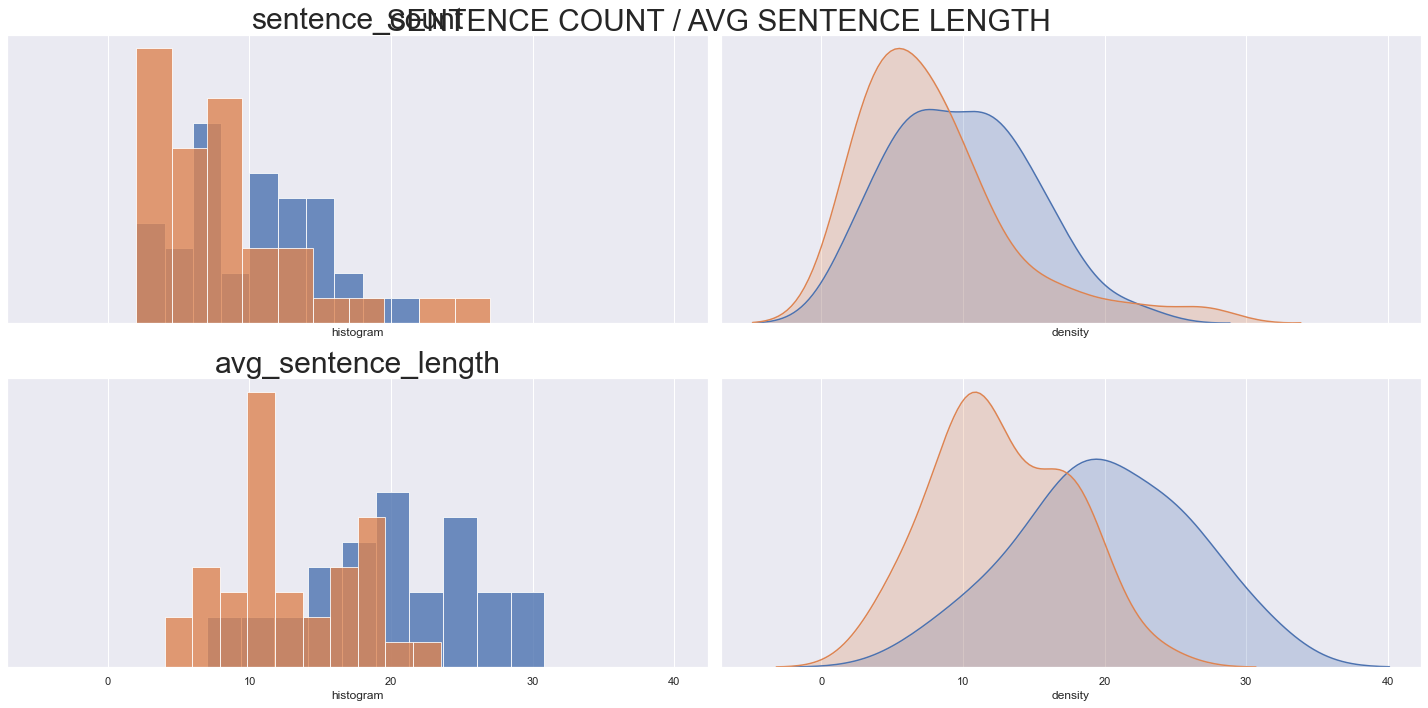

In [13]:
sns.set(style="darkgrid")
fig6,ax6=plt.subplots(2,2,figsize=(20,10),sharex=True)


k=0
y="Type"

fig6.suptitle(' SENTENCE COUNT / AVG SENTENCE LENGTH', fontsize=30)

for x in L0[2:4]:
    
    ax6[k,0].set_title(x,fontsize=30)
    
    for i in df[y].unique():
        
        sns.distplot(df[df[y]==i][x], hist=True, kde=False, 
                     bins=10, hist_kws={"alpha":0.8}, 
                     axlabel="histogram", ax=ax6[k,0])
        
        sns.distplot(df[df[y]==i][x], hist=False, kde=True, 
                     kde_kws={"shade":True}, axlabel="density",   
                     ax=ax6[k,1])
        
    k=k+1
    
plt.setp(ax6, yticks=[])
fig6.subplots_adjust(top= 0.93, wspace=0.3 ,hspace=0.5)
fig6.tight_layout()

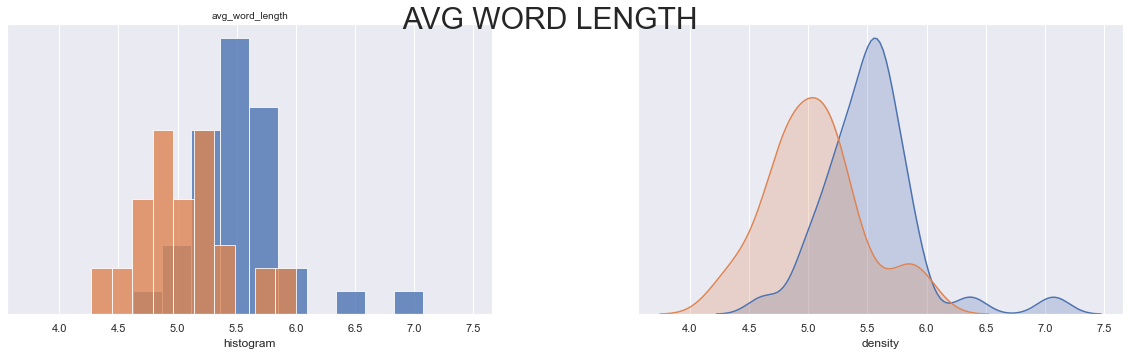

In [14]:
sns.set(style="darkgrid")
fig7,ax7=plt.subplots(1,2,figsize=(20,5),sharex=True)


k=0
y="Type"

fig7.suptitle(' AVG WORD LENGTH', fontsize=30)

#for x in 'avg_word_length':
x='avg_word_length'
ax7[0].set_title(x,fontsize=10)

for i in df[y].unique():

    sns.distplot(df[df[y]==i][x], hist=True, kde=False, bins=10, 
                 hist_kws={"alpha": 0.8}, 
                 axlabel="histogram",
                 ax=ax7[0])

    sns.distplot(df[df[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True},
                 axlabel="density",   
                 ax=ax7[1])



plt.setp(ax7, yticks=[])
fig7.subplots_adjust(top=0.93, wspace=0.3 ,hspace=0.5)

Remarks:
* In general we have <b>greater words' & sentences' length and higer words' and characters' counts in wikipédia abstract compared to vikidia one</b>. It might be interesting to get these features

* Let's further analyze the 'semantic complexity' by analyzing POS tags diversity in documents. Intuitively we can think wikipedia asbtract written with more complexe POS Structure.

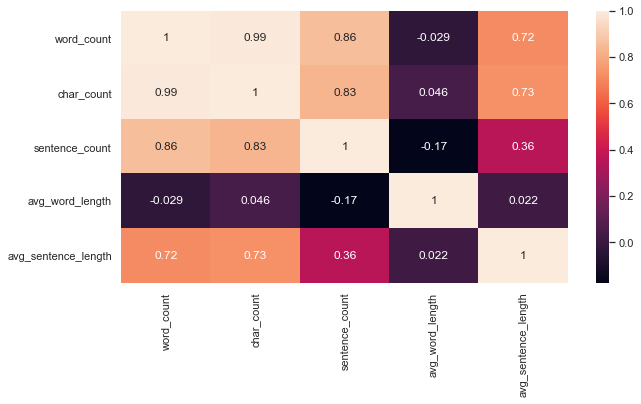

In [15]:
fig=plt.figure(figsize=(10,5))

corrMatrix = df_meta.corr()
sns.heatmap(corrMatrix, annot=True)

<b>Char count</b> is correlated with all other feature excepted <b>word length</b> are higghly correlated. We are going to select 'char counts' and 'avg_word_length' as they look more contrastive features between wikipedia end vikidia on preceding graphs.

# Syntactic features

Let's try to identify new features based on language syntax through analyzing documents' POS Tags proportion in each documents.
Intuitively we can think vikidia documents algorithms as easier to understand compared to wikipedia ones.

In [16]:
## tag text and exctract tags into a list
df["tags"] = df["Abstract"].apply( lambda x: [(tag.text, tag.pos_) 
                                for tag in nlp(x)] )

## utils function to count the element of a list
def utils_lst_count(lst):
    
    dic_counter = collections.Counter()
    
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count


## count tags
df["tags"] = df["tags"].apply(lambda x: utils_lst_count(x))

## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0

## extract features
tags_set = []

for lst in df["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1]) 
tags_set = list(set(tags_set))
print(tags_set)
for feature in tags_set:
     df["tags_"+feature] = df["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))



['ADP', 'NUM', 'SYM', 'VERB', 'CCONJ', 'PUNCT', 'PROPN', 'ADV', 'SPACE', 'PRON', 'SCONJ', 'X', 'ADJ', 'DET', 'AUX', 'NOUN']


In [17]:
df.columns

Index(['Type', 'Keyword', 'Abstract', 'text_BOW', 'sample_split', 'word_count',
       'char_count', 'sentence_count', 'avg_word_length',
       'avg_sentence_length', 'tags', 'tags_ADP', 'tags_NUM', 'tags_SYM',
       'tags_VERB', 'tags_CCONJ', 'tags_PUNCT', 'tags_PROPN', 'tags_ADV',
       'tags_SPACE', 'tags_PRON', 'tags_SCONJ', 'tags_X', 'tags_ADJ',
       'tags_DET', 'tags_AUX', 'tags_NOUN'],
      dtype='object')

In [18]:
### FOLLONWING TAGS COEFFICIENTS ARE ALMOST ALWAYS EQUAL TO ZERO for all documents, they don't help into 
### THEY DON'T Discriminate well text with each other

del df['tags_X']
del df['tags_SYM']
del df['tags_SPACE']
#df.columns

In [19]:
df_syntactic=df.loc[:,[ 'tags_PUNCT', 'tags_NOUN', 'tags_ADV',
       'tags_VERB', 'tags_DET', 'tags_ADJ', 'tags_AUX', 'tags_SCONJ',
       'tags_PROPN', 'tags_ADP', 'tags_NUM', 'tags_PRON',
       'tags_CCONJ']]

### we normalize by word_counts in order to identify relative differences between doc structure
df_syntactic=df_syntactic.divide(df_meta['word_count'],axis='rows')

#print(df_syntactic.shape)
#df_syntactic.head()

In [20]:
print(df_syntactic.shape)
print(df_meta.shape)
print(df.shape)

(74, 13)
(74, 5)
(74, 24)


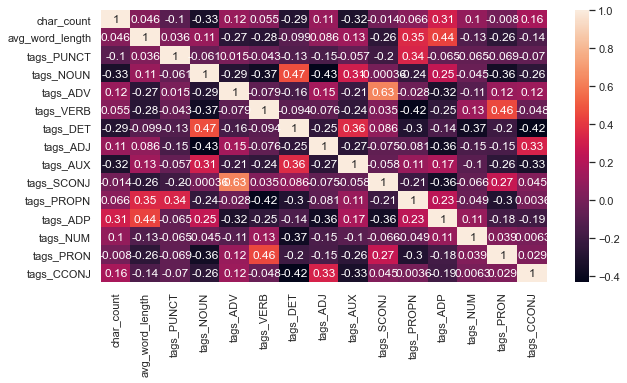

In [21]:
df_features=pd.concat([df_meta,df_syntactic],axis=1)
df_features= df_features.drop(['word_count','avg_sentence_length','sentence_count'],axis=1)

fig=plt.figure(figsize=(10,5))

corrMatrix = df_features.corr()
sns.heatmap(corrMatrix, annot=True)

Remaining features don't seem to be highly correlated. Good.

In [137]:
# Saving the objects:
with open('//Dataframes.pkl', 'wb') as f:  
   pickle.dump([df, df_features, df_meta,df_syntactic], f)

# Getting back the objects:
#with open('Dataframes.pkl','rb') as f:  
    #f, df_features, df_meta,df_syntactic = pickle.load(f)

In [23]:
df_features['Keyword'] = df['Keyword']
df_features['Type']=df['Type']

In [24]:
#vectorizer = feature_extraction.text.TfidfVectorizer(max_features=10000, ngram_range=(1,2))
classifier = naive_bayes.MultinomialNB()

def sample_split_feature(n,df):
    split_sets= []

    for i in range(n):

        df["sample_split"] = "train"

        keywords =  list(set(df.Keyword))

        words_test = sample(keywords, int((0.3*len(keywords))))

        for word in words_test:

            df.loc[df.Keyword == word, 'sample_split'] = "test"
        #df_train=df[df.sample_split=="train"]


        x_train = df[df.sample_split=="train"].drop( ['sample_split','Keyword','Type'], axis=1)
        y_train = df.loc[df.sample_split=="train","Type"].values

        x_test =  df[df.sample_split=="test"].drop( ['sample_split','Keyword','Type'], axis=1)
        y_test = df.loc[df.sample_split=="test","Type"].values

        split_set = [x_train, x_test , y_train, y_test]

        split_sets.append(split_set)
        
    return split_sets

In [25]:
df_features.columns

Index(['char_count', 'avg_word_length', 'tags_PUNCT', 'tags_NOUN', 'tags_ADV',
       'tags_VERB', 'tags_DET', 'tags_ADJ', 'tags_AUX', 'tags_SCONJ',
       'tags_PROPN', 'tags_ADP', 'tags_NUM', 'tags_PRON', 'tags_CCONJ',
       'Keyword', 'Type'],
      dtype='object')

In [26]:
df_features

,char_count,avg_word_length,tags_PUNCT,tags_NOUN,tags_ADV,tags_VERB,tags_DET,tags_ADJ,tags_AUX,tags_SCONJ,tags_PROPN,tags_ADP,tags_NUM,tags_PRON,tags_CCONJ,Keyword,Type
0,1007,5.594444,0.183333,0.272222,0.044444,0.088889,0.144444,0.072222,0.033333,0.011111,0.050000,0.188889,0.011111,0.050000,0.044444,Éléphant,wikipedia
1,1152,4.626506,0.144578,0.232932,0.072289,0.080321,0.176707,0.076305,0.036145,0.008032,0.040161,0.168675,0.056225,0.056225,0.028112,Lion,wikipedia
2,1468,5.150877,0.136842,0.249123,0.091228,0.063158,0.175439,0.101754,0.038596,0.017544,0.035088,0.157895,0.007018,0.052632,0.038596,Zèbre,wikipedia
3,973,5.560000,0.160000,0.251429,0.062857,0.091429,0.131429,0.068571,0.040000,0.005714,0.057143,0.211429,0.028571,0.051429,0.034286,Girafe,wikipedia
4,1103,5.487562,0.159204,0.318408,0.034826,0.074627,0.129353,0.064677,0.029851,0.004975,0.049751,0.124378,0.049751,0.054726,0.069652,Rhinocéros,wikipedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1193,4.791165,0.220884,0.289157,0.064257,0.088353,0.172691,0.092369,0.044177,0.020080,0.016064,0.120482,0.020080,0.032129,0.028112,Renard,vikidia
70,520,5.148515,0.158416,0.277228,0.029703,0.099010,0.148515,0.089109,0.069307,0.000000,0.059406,0.227723,0.039604,0.019802,0.019802,Buffle,vikidia
71,141,5.875000,0.166667,0.333333,0.041667,0.083333,0.250000,0.125000,0.041667,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,Vipère,vikidia
72,511,4.820755,0.179245,0.311321,0.018868,0.122642,0.207547,0.056604,0.009434,0.018868,0.000000,0.141509,0.018868,0.037736,0.018868,Scorpion,vikidia


In [27]:
df_features.columns

Index(['char_count', 'avg_word_length', 'tags_PUNCT', 'tags_NOUN', 'tags_ADV',
       'tags_VERB', 'tags_DET', 'tags_ADJ', 'tags_AUX', 'tags_SCONJ',
       'tags_PROPN', 'tags_ADP', 'tags_NUM', 'tags_PRON', 'tags_CCONJ',
       'Keyword', 'Type'],
      dtype='object')

Mean Accuracy: 0.755
Variance Accuracy 0.005


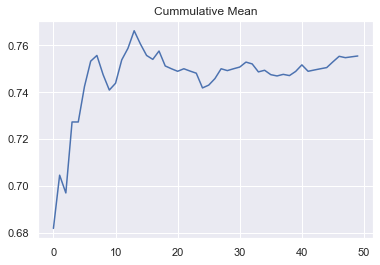

In [39]:
dtm='feature' # tf-idf or count
nb_try=50

cleaning=True
feature_sample=sample_split_feature(nb_try,df_features)
Scores = Naive_Bayes_model_evaluation(feature_sample,dtm)
fig = plt.figure()
plt.title('Cummulative Mean')
Scores.mean()

print("Mean Accuracy:",  round(Scores.mean(),3))
print("Variance Accuracy",round(Scores.var(),3))


inverse=[1/(i+1) for i in range(len(Scores.cumsum()))]
(inverse*Scores.cumsum()).plot(kind="line")

We get 75% accuracy average with much lower dimension.

# 3. SVD ?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


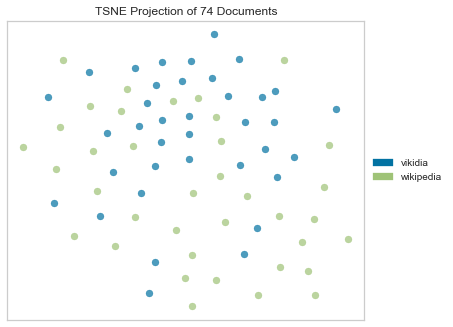

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


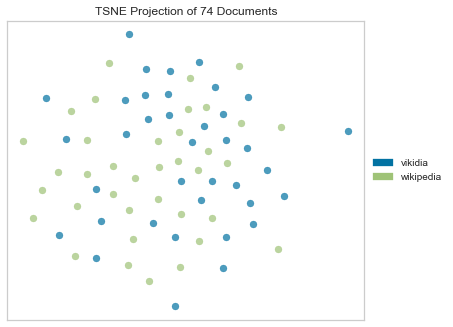

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from yellowbrick.text import TSNEVisualizer
from yellowbrick.datasets import load_hobbies

#fi,ax=plt.subplots(2,2)
column=['Abstract','text_BOW']
for col in column:
    
    plt.subplot()
    # Load the data and create document vectors
    corpus = list(df.loc[:,col].values)
    tfidf = CountVectorizer()

    X = tfidf.fit_transform(corpus)
    y = list(df.Type.values)

    # Create the visualizer and draw the vectors
    tsne = TSNEVisualizer()
    tsne.fit(X, y)
    tsne.show()
    
#plt.plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


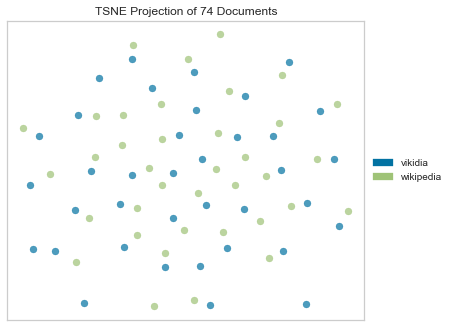

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


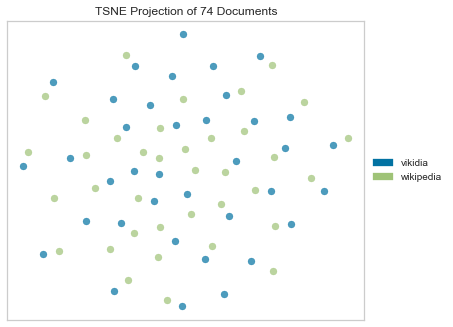

In [130]:
fi,ax=plt.subplots(2,2)
column=['Abstract','text_BOW']

for col in column:
    
    plt.subplot()
    
    # Load the data and create document vectors
    corpus = list(df.loc[:,col].values)
    tfidf = TfidfVectorizer()

    X = tfidf.fit_transform(corpus)
    y = list(df.Type.values)

    # Create the visualizer and draw the vectors
    tsne = TSNEVisualizer()
    tsne.fit(X, y)
    tsne.show()
    
    


Tfidf Does'nt see appropriate to use SVD ( at least in two dimensions) for our study case.


# 4. Future Improvements:

<ol>

<li>Feature Engineering with other features, mixing with document representation + Selection variable ( Lasso or other way)</li>
<li> Trying SVD with good kernel</li>
<li>Word embeddings/Doc2vec  which is able to capture interesting syntatical  and semantical aspects</li>

</ol>